# **Applied Machine Learning and Exploratory Data Analaysis of Grocery Store Chiller Data**

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The cleaned data is stored in my own GitHub's account for easy access and collaboration with team member.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/azwanzuharimi/chiller_2014_2015/main/chiller_2014_2015.csv')
df 

,Unnamed: 0,Timestamp,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (kmh),Pressure (mm)
0,0,2014-08-09 00:00:00,82.176,30.458,465.212,123.172,86,79,83.74,27.04,833.4502
1,1,2014-08-09 00:30:00,80.928,30.167,446.491,121.370,86,79,83.74,24.96,833.4502
2,2,2014-08-09 01:00:00,81.216,30.361,448.528,123.808,86,79,83.74,24.96,833.4502
3,3,2014-08-09 01:30:00,81.408,30.458,444.745,124.020,86,79,83.74,24.96,833.4502
4,4,2014-08-09 02:00:00,81.312,30.458,441.738,124.020,86,79,83.74,24.96,833.4502
...,...,...,...,...,...,...,...,...,...,...,...
13610,13610,2015-05-24 11:00:00,104.256,32.398,562.503,140.768,88,79,78.44,10.40,835.1266
13611,13611,2015-05-24 11:30:00,104.544,32.204,550.281,136.316,88,79,78.44,12.48,835.1266
13612,13612,2015-05-24 12:00:00,104.352,32.010,544.849,133.242,86,79,83.74,12.48,835.1266
13613,13613,2015-05-24 12:30:00,104.448,32.204,549.020,134.938,86,81,89.04,6.24,834.2884


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
print("Null values: ",'\n', df.isna().sum())
print('\n\n')
print("Duplicate values: ", df.duplicated().sum())
print('\n\n')
display(df[df.duplicated()])

Null values:  
 Timestamp                           0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (kmh)                    0
Pressure (mm)                       0
dtype: int64



Duplicate values:  0





,Timestamp,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (kmh),Pressure (mm)


In [ ]:
df = df.drop_duplicates()

In [ ]:
# info --> used to generate the fulls summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13615 entries, 0 to 13614
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Timestamp                         13615 non-null  object 
 1   Chilled Water Rate (L/sec)        13615 non-null  float64
 2   Cooling Water Temperature (C)     13615 non-null  float64
 3   Building Load (RT)                13615 non-null  float64
 4   Chiller Energy Consumption (kWh)  13615 non-null  float64
 5   Outside Temperature (F)           13615 non-null  int64  
 6   Dew Point (F)                     13615 non-null  int64  
 7   Humidity (%)                      13615 non-null  float64
 8   Wind Speed (kmh)                  13615 non-null  float64
 9   Pressure (mm)                     13615 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.1+ MB


Statistical summary of dataset
(*by default this method  works only on int and float values*)


In [ ]:
display(df.describe())

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (kmh),Pressure (mm)
count,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000,13615.000000
mean,92.871091,30.673609,505.312206,134.420301,87.104003,78.990892,82.517049,13.118131,832.841081
std,12.056551,1.215699,93.445924,31.969971,3.841550,1.889539,11.713831,7.784230,1.436655
min,69.504000,25.026000,53.447000,19.080000,77.000000,63.000000,36.040000,0.000000,827.582800
25%,83.424000,29.876000,430.195000,111.936000,85.000000,77.000000,74.200000,6.240000,831.773800
50%,90.432000,30.555000,480.732000,125.186000,86.000000,79.000000,83.740000,12.480000,832.612000
75%,101.856000,31.525000,577.150000,146.598000,90.000000,81.000000,89.040000,18.720000,833.450200
max,135.840000,35.114000,1055.748000,298.072000,97.000000,85.000000,106.000000,43.680000,836.803000


In order to see the statistical summary of non numerical features, we include a certain parameter

In [ ]:
df.describe(include=['object','bool'])

,Timestamp
count,13615
unique,13615
top,2014-12-30 17:30:00
freq,1


Maximum for every column

In [ ]:
df.max()

Timestamp                           2015-05-24 13:00:00
Chilled Water Rate (L/sec)                       135.84
Cooling Water Temperature (C)                    35.114
Building Load (RT)                              1055.75
Chiller Energy Consumption (kWh)                298.072
Outside Temperature (F)                              97
Dew Point (F)                                        85
Humidity (%)                                        106
Wind Speed (kmh)                                  43.68
Pressure (mm)                                   836.803
dtype: object

We set index based on the timestamp (time when the sensor data are taken). This also will make plotting easier using Pandas plotting features

In [ ]:
df = df.set_index('Timestamp')

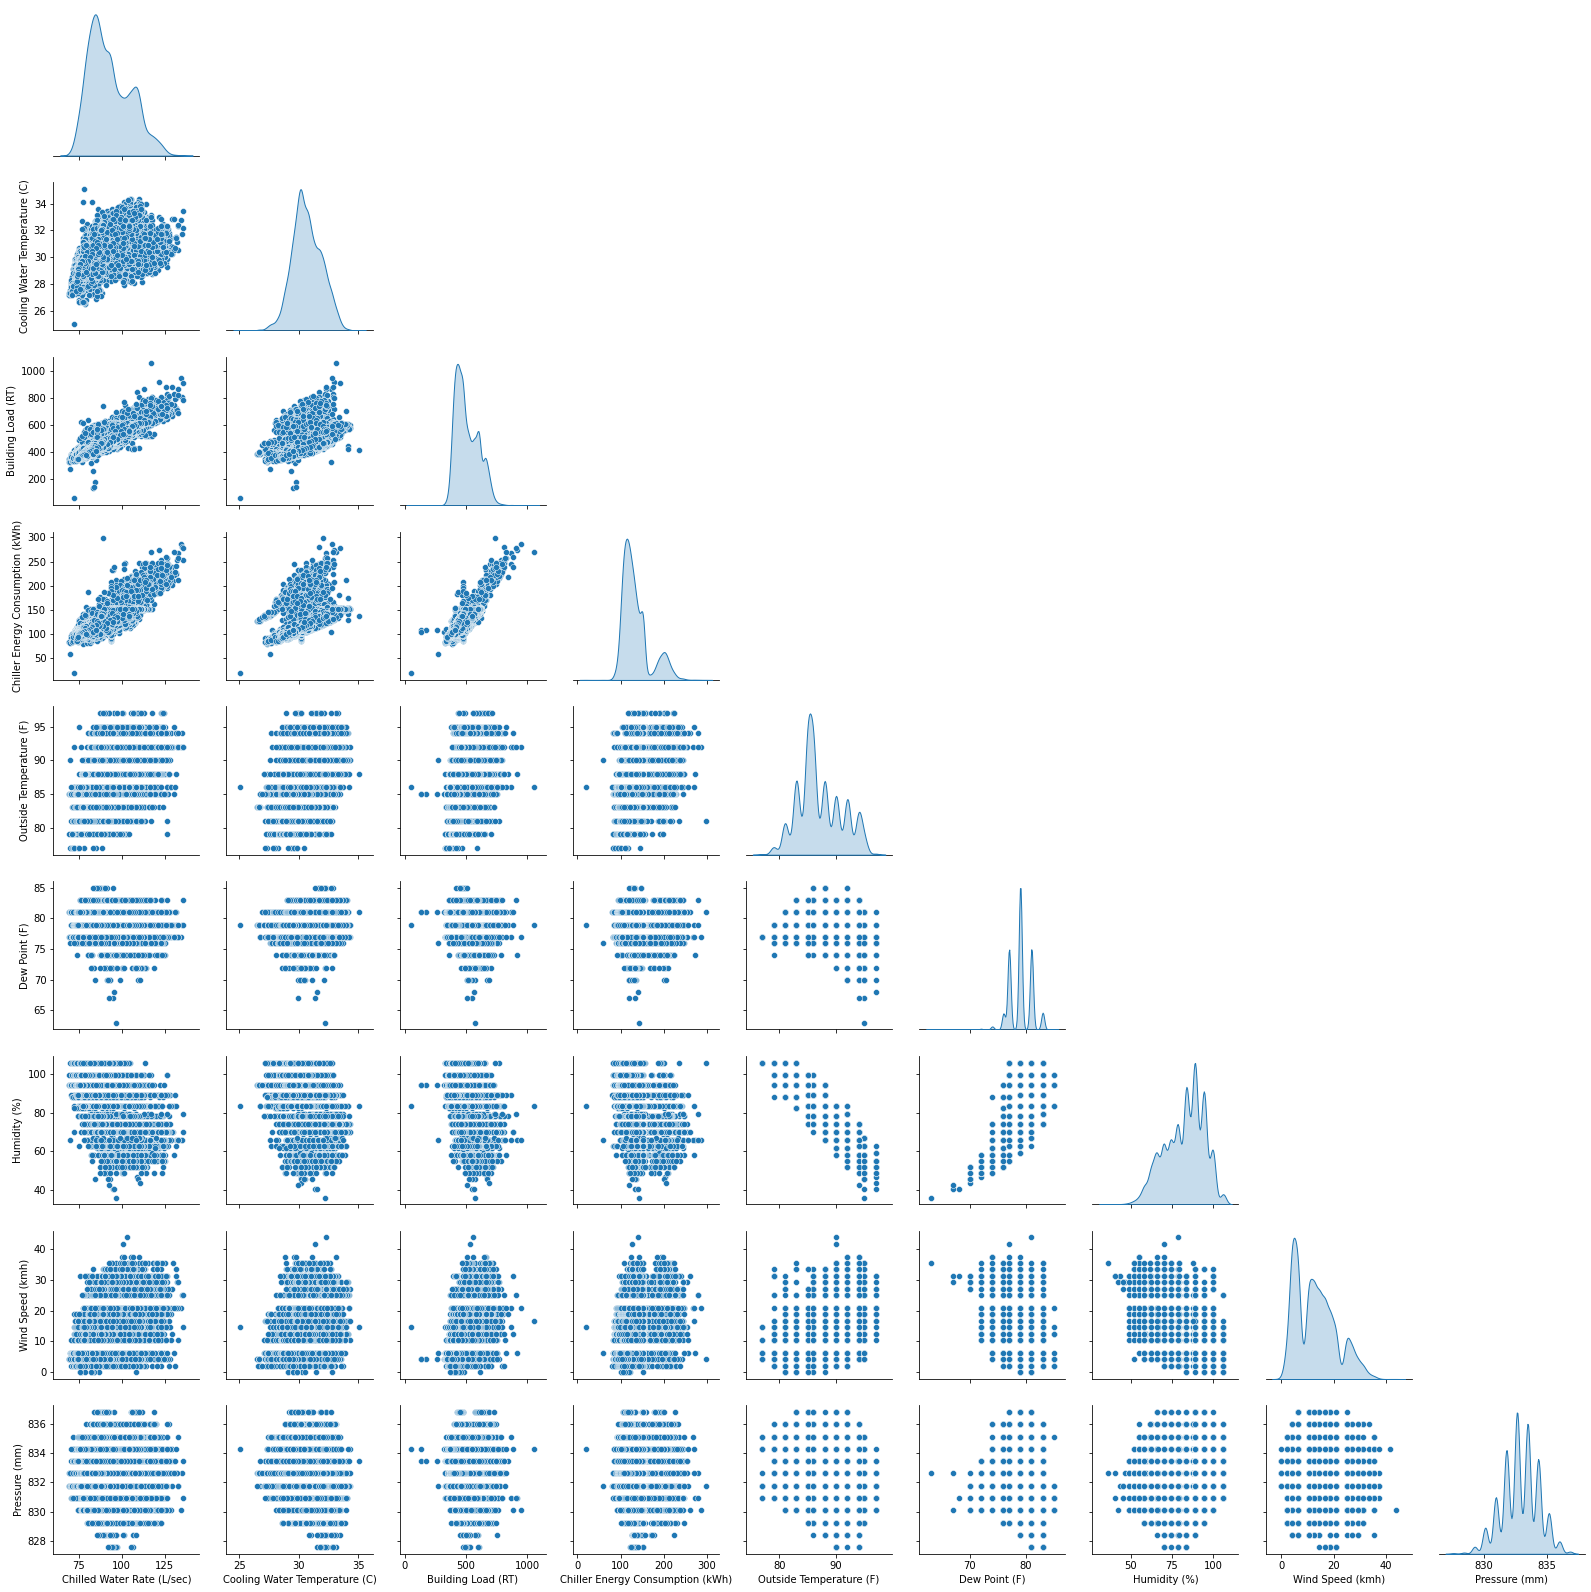

In [ ]:
pairs = sns.pairplot(df,diag_kind='kde', kind='scatter', corner=True, aspect = 1);

The objective for the pairplot above is to find out any relation between each columns in the dataset. 

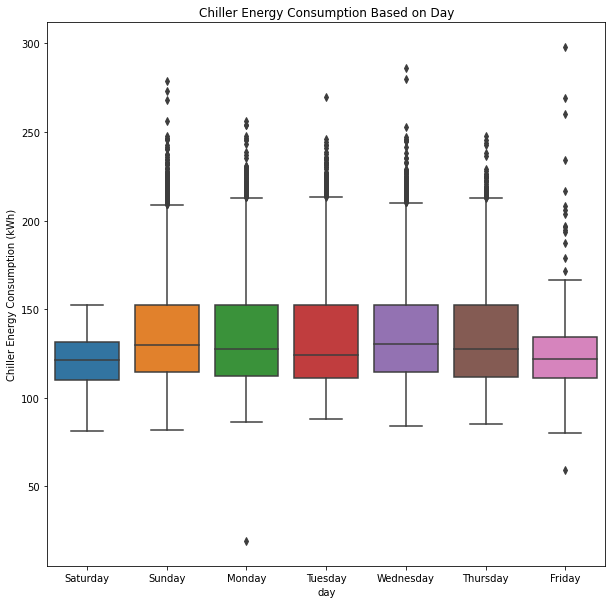

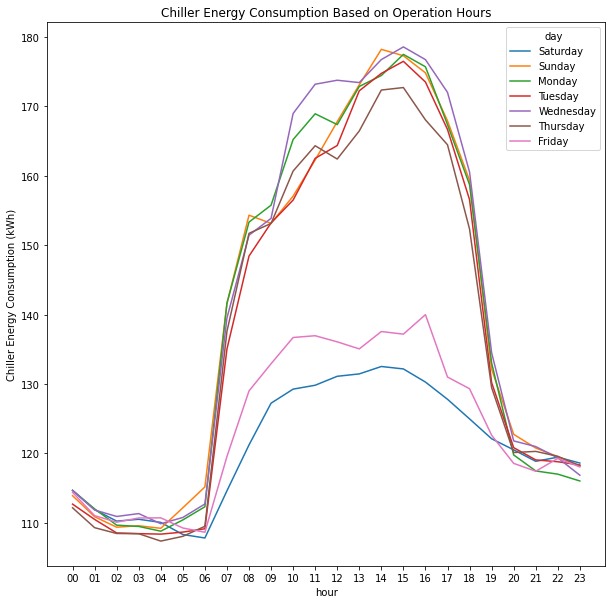

In [ ]:
df.index = pd.to_datetime(df.index)
df['day'] = df.index.strftime('%A')
df['hour'] = df.index.strftime('%H')

plt.figure(figsize=(10,10));
sns.boxplot(data=df, x='day', y= 'Chiller Energy Consumption (kWh)');
plt.title('Chiller Energy Consumption Based on Day');

plt.figure(figsize=(10,10));
sns.lineplot(data=df, x='hour', y= 'Chiller Energy Consumption (kWh)', hue='day', ci=None);
plt.title('Chiller Energy Consumption Based on Operation Hours');



First figure: 

Analysis of energy consumption based on day of week. Friday and Saturday shows lower energy consumption compared to other days. It is also shown that the chiller did not stop from operation during the period of this dataset, but only running at minimal load when there is no demand.

Second figure:

Analysis of energy consumption based on operation hours. We can see that the energy required increase at 6am and decrease at 6pm. Except for Friday & Saturday.

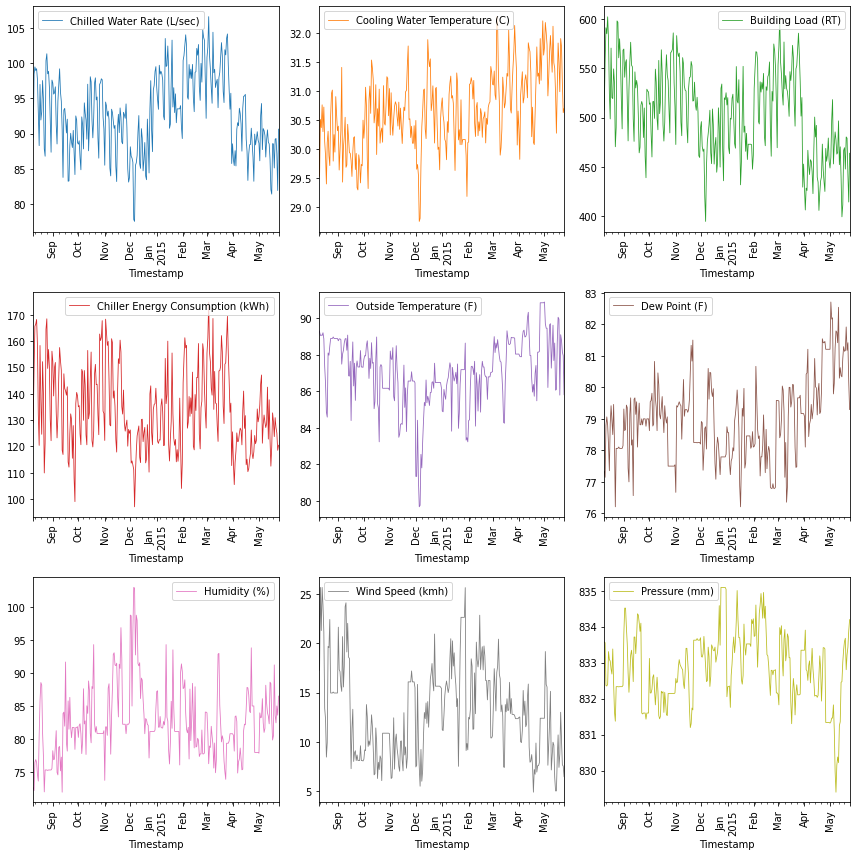

In [ ]:
dft = df.copy()

dft = dft.resample('D').mean()

figc, c = plt.subplots(3, 3, figsize=(12, 12), tight_layout=True)

dft.plot(ax=c, subplots=True, rot=90, linewidth = 0.8);

Over the long term, it is seen that cooling water temperature is increasing. This might show that there are chiller effectiveness is decreasing and require maintenance.

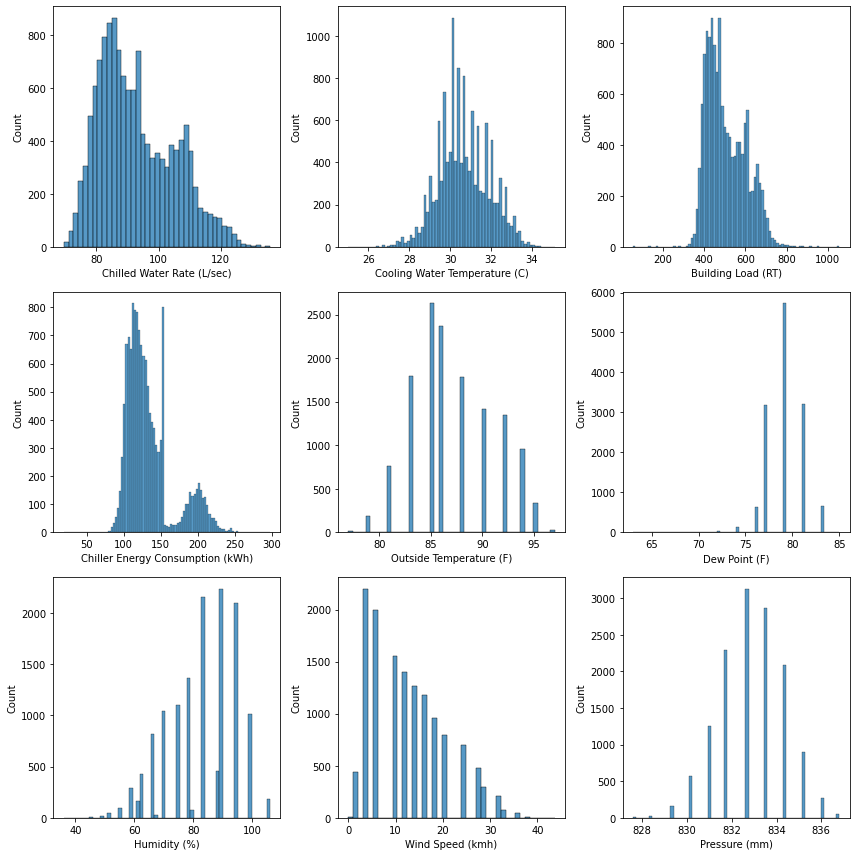

In [ ]:
fig, b = plt.subplots(3, 3, figsize=(12, 12), tight_layout=True)

col_list = list(df.columns)

counter = 0
for row in range(0,3):
  for col in range(0,3):
    # df[col_list[counter]].plot(alpha=0.7, ax=b[row,col] , kind='hist');
    sns.histplot(df[col_list[counter]], ax=b[row,col])
    b[row,col].set_xlabel(col_list[counter])
    counter += 1

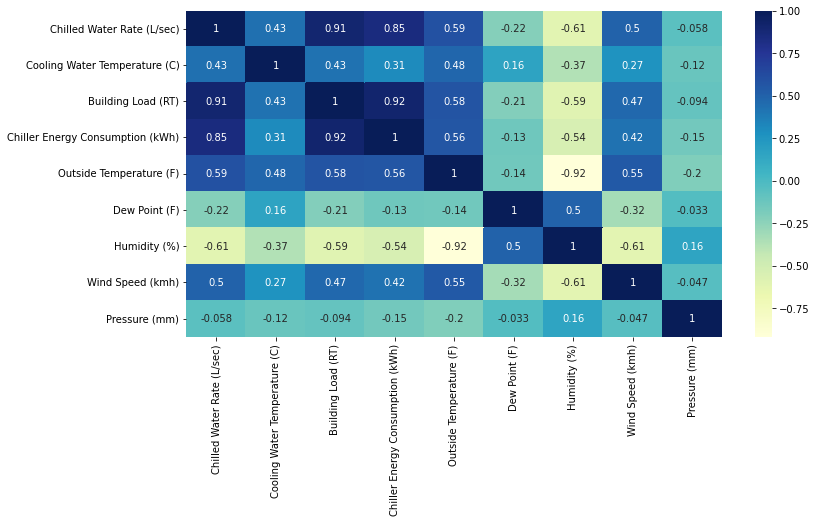

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [ ]:
to_plot = ['Chilled Water Rate (L/sec)',
 'Cooling Water Temperature (C)',
 'Building Load (RT)',
  'Outside Temperature (F)',
 'Dew Point (F)',
 'Humidity (%)',
 'Wind Speed (kmh)',
 'Pressure (mm)']

Plot input variables against output variable (or target) which is energy usage to find correlations visually.

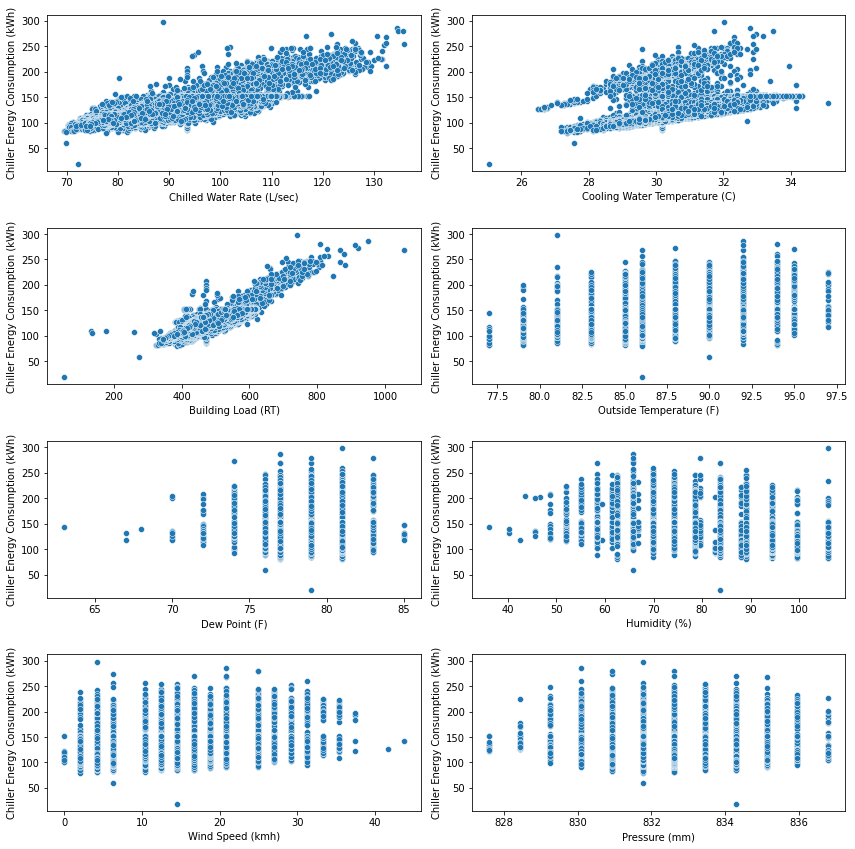

In [ ]:
figg, axx = plt.subplots(4,2, figsize=(12,12))

counter1 = 0
for row in range(0,4):
  for col in range(0,2):
    sns.scatterplot(x=df[to_plot[counter1]], y=df['Chiller Energy Consumption (kWh)'], ax=axx[row, col])
    counter1 += 1

figg.tight_layout()


From above analysis, it can be seen that the p value is zero. Hence all of the columns have significant impact on the target variable (energy consumption). From here we decide to use all of the columns as a feature to perform machine learning.

In [ ]:
from scipy import stats

print("T-test for Chilled Water Rate (L/sec): ",stats.ttest_ind(df['Chilled Water Rate (L/sec)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Cooling Water Temperature (C) : ",stats.ttest_ind(df['Cooling Water Temperature (C)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Building Load (RT) : ",stats.ttest_ind(df['Building Load (RT)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Outside Temperature (F) : ",stats.ttest_ind(df['Outside Temperature (F)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Dew Point (F) : ",stats.ttest_ind(df['Dew Point (F)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Humidity (%) : ",stats.ttest_ind(df['Humidity (%)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Wind Speed (kmh) : ",stats.ttest_ind(df['Wind Speed (kmh)'],df['Chiller Energy Consumption (kWh)']))
print("T-test for Pressure (mm) : ",stats.ttest_ind(df['Pressure (mm)'],df['Chiller Energy Consumption (kWh)']))


T-test for Chilled Water Rate (L/sec):  Ttest_indResult(statistic=-141.89085652520154, pvalue=0.0)
T-test for Cooling Water Temperature (C) :  Ttest_indResult(statistic=-378.37904197863634, pvalue=0.0)
T-test for Building Load (RT) :  Ttest_indResult(statistic=438.18742558320736, pvalue=0.0)
T-test for Outside Temperature (F) :  Ttest_indResult(statistic=-171.46063706109612, pvalue=0.0)
T-test for Dew Point (F) :  Ttest_indResult(statistic=-201.95267166359054, pvalue=0.0)
T-test for Humidity (%) :  Ttest_indResult(statistic=-177.87168172040467, pvalue=0.0)
T-test for Wind Speed (kmh) :  Ttest_indResult(statistic=-430.1586716591259, pvalue=0.0)
T-test for Pressure (mm) :  Ttest_indResult(statistic=2546.511666680099, pvalue=0.0)


In [ ]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor, plot_importance

from sklearn.svm import SVR #(Support Vector Regression)
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error

In [ ]:
X_untreated = df[to_plot]
y_untreated = df['Chiller Energy Consumption (kWh)']

X_train_untreated, X_test_untreated, y_train_untreated, y_test_untreated = train_test_split(X_untreated, y_untreated, test_size = 0.2, random_state = 10)

In [ ]:
#Basic Linear Regression
linear_regression_untreated = LinearRegression().fit(X_train_untreated, y_train_untreated)
y_predicted_linear_regression_untreated = linear_regression_untreated.predict(X_test_untreated)
mse_linear_regression_untreated = mean_squared_error(y_test_untreated, y_predicted_linear_regression_untreated, squared=False)

#Basic LGBM Regressor
lgbm_untreated = LGBMRegressor().fit(X_train_untreated, y_train_untreated)
y_predicted_lgbm_untreated = lgbm_untreated.predict(X_test_untreated)
mse_lgbm_untreated = mean_squared_error(y_test_untreated, y_predicted_lgbm_untreated, squared=False)

#Basic SVR (default 'rbf' kernel)
svr_rbf_untreated = SVR().fit(X_train_untreated, y_train_untreated)
y_predicted_svr_rbf_untreated = svr_rbf_untreated.predict(X_test_untreated)
mse_svr_rbf_untreated = mean_squared_error(y_test_untreated, y_predicted_svr_rbf_untreated, squared=False)

#Basic SVR ('linear' kernel) - skipped due to similar result as using rbf kernel but take a long time to process
"""
svr_linear_untreated = SVR(kernel='linear').fit(X_train_untreated, y_train_untreated)
y_predicted_svr_linear_untreated = svr_rbf_untreated.predict(X_test_untreated)
mse_svr_linear_untreated = mean_squared_error(y_test_untreated, y_predicted_svr_linear_untreated, squared=False)
"""
#Basic Gradient Boosting
gboost_untreated = GradientBoostingRegressor().fit(X_train_untreated, y_train_untreated)
y_predicted_gboost_untreated = gboost_untreated.predict(X_test_untreated)
mse_gboost_untreated = mean_squared_error(y_test_untreated, y_predicted_gboost_untreated, squared=False)

#Basic XGBRegressor
xgb_untreated = XGBRegressor().fit(X_train_untreated, y_train_untreated)
y_predicted_xgb_untreated = xgb_untreated.predict(X_test_untreated)
mse_xgb_untreated = mean_squared_error(y_test_untreated, y_predicted_xgb_untreated, squared=False)


print('Linear Regression: ', mse_linear_regression_untreated)
print('LGBM: ', mse_lgbm_untreated)
print('SVR (rbf): ', mse_svr_rbf_untreated)
# print('SVR (linear): ', mse_svr_linear_untreated)
print('Gradient Boosting: ', mse_gboost_untreated)
print('XGBoost: ', mse_xgb_untreated)
print(f'The average standard deviation of prediction of error for all of the models above are: {np.average(np.array( (mse_linear_regression_untreated, mse_lgbm_untreated, mse_svr_rbf_untreated, mse_gboost_untreated, mse_xgb_untreated)))}')

[15:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Linear Regression:  11.53168144463671
LGBM:  6.270176805984856
SVR (rbf):  13.596619670162864
Gradient Boosting:  6.9966695969306345
XGBoost:  7.047432505777833
The average standard deviation of prediction of error for all of the models above are: 9.08851600469858


Using basic data (without pre-processing), we train our model using basic parameters of each of of the following regression models:
1. Linear Regression
2. LGBM Regressor
3. Support Vector Regression (SVR)
4. Gradient Boosting Regressor
5. XGBoost Regressor

The avg standard deviation of error prediction is ~9.1kWh.
In order to reduce the error, we try to pre-process the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train_untreated)
X_test_scaled = standard_scaler.transform(X_test_untreated)

In [ ]:
#Scaled Linear Regression
linear_regression_scaled = LinearRegression().fit(X_train_scaled, y_train_untreated)
y_predicted_linear_regression_scaled = linear_regression_scaled.predict(X_test_scaled)
mse_linear_regression_scaled = mean_squared_error(y_test_untreated, y_predicted_linear_regression_untreated, squared=False)

#Scaled LGBM Regressor
lgbm_scaled = LGBMRegressor().fit(X_train_scaled, y_train_untreated)
y_predicted_lgbm_scaled = lgbm_scaled.predict(X_test_scaled)
mse_lgbm_scaled = mean_squared_error(y_test_untreated, y_predicted_lgbm_untreated, squared=False)

#Scaled SVR (default 'rbf' kernel)
svr_rbf_scaled = SVR().fit(X_train_scaled, y_train_untreated)
y_predicted_svr_rbf_scaled = svr_rbf_scaled.predict(X_test_scaled)
mse_svr_rbf_scaled = mean_squared_error(y_test_untreated, y_predicted_svr_rbf_untreated, squared=False)

#Scaled SVR ('linear' kernel) - skipped due to similar result as using rbf kernel but take a long time to process
"""
svr_linear_scaled = SVR(kernel='linear').fit(X_train_scaled, y_train_untreated)
y_predicted_svr_linear_scaled = svr_rbf_scaled.predict(X_test_scaled)
mse_svr_linear_scaled = mean_squared_error(y_test_untreated, y_predicted_svr_linear_untreated, squared=False)
"""
#Scaled Gradient Boosting
gboost_scaled = GradientBoostingRegressor().fit(X_train_scaled, y_train_untreated)
y_predicted_gboost_scaled = gboost_scaled.predict(X_test_scaled)
mse_gboost_scaled = mean_squared_error(y_test_untreated, y_predicted_gboost_untreated, squared=False)

#Scaled XGBRegressor
xgb_scaled = XGBRegressor().fit(X_train_scaled, y_train_untreated)
y_predicted_xgb_scaled = xgb_scaled.predict(X_test_scaled)
mse_xgb_scaled = mean_squared_error(y_test_untreated, y_predicted_xgb_untreated, squared=False)


print('Linear Regression: ', mse_linear_regression_scaled)
print('LGBM: ', mse_lgbm_scaled)
print('SVR (rbf): ', mse_svr_rbf_scaled)
# print('SVR (linear): ', mse_svr_linear_scaled)
print('Gradient Boosting: ', mse_gboost_scaled)
print('XGBoost: ', mse_xgb_scaled)
print(f'The average standard deviation of prediction of error for all of the models above are: {np.average(np.array( (mse_linear_regression_scaled, mse_lgbm_scaled, mse_svr_rbf_scaled, mse_gboost_scaled, mse_xgb_scaled)))}')

[15:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Linear Regression:  11.53168144463671
LGBM:  6.270176805984856
SVR (rbf):  13.596619670162864
Gradient Boosting:  6.9966695969306345
XGBoost:  7.047432505777833
The average standard deviation of prediction of error for all of the models above are: 9.08851600469858


It seems like data pre-processing using Standard Scaler give out the same model accuracy.

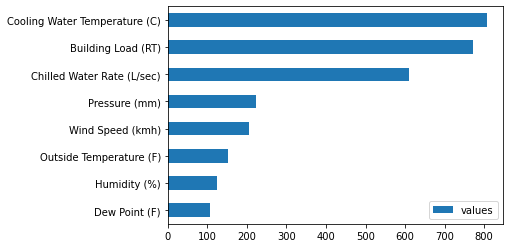

In [ ]:
importances = pd.DataFrame(data=lgbm_scaled.feature_importances_.reshape(1,-1), columns = list(X_train_untreated.columns)).T
importances.columns = ['values']
importances.sort_values('values', ascending=True).plot.barh()

Choosing the best model with least error, we found that the most important features to predict energy consumption are 
1. Cooling water temperature
2. Building load
3. Chilled water flow rate

What if we only select the 3 features above as the input to the machine learning model?

In [ ]:
threes = ['Chilled Water Rate (L/sec)', 'Cooling Water Temperature (C)', 'Building Load (RT)']

X_three = df[threes]
y_three = df['Chiller Energy Consumption (kWh)']

X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, test_size = 0.2, random_state = 10)

#Scaling
standard_scaler_three = StandardScaler()
X_train_scaled_three = standard_scaler_three.fit_transform(X_train_three)
X_test_scaled_three = standard_scaler_three.transform(X_test_three)

#Scaled Linear Regression
linear_regression_scaled_three = LinearRegression().fit(X_train_scaled_three, y_train_three)
y_predicted_linear_regression_scaled_three = linear_regression_scaled_three.predict(X_test_scaled_three)
mse_linear_regression_scaled_three = mean_squared_error(y_test_three, y_predicted_linear_regression_scaled_three, squared=False)

 #Scaled LGBM Regressor
lgbm_scaled_three = LGBMRegressor().fit(X_train_scaled_three, y_train_three)
y_predicted_lgbm_scaled_three = lgbm_scaled_three.predict(X_test_scaled_three)
mse_lgbm_scaled_three = mean_squared_error(y_test_three, y_predicted_lgbm_scaled_three, squared=False)


print('The mean root mean squared error for the Linear Regression: ', mse_linear_regression_scaled_three)
print('The mean root mean squared error for the LGBM: ', mse_lgbm_scaled_three)

The mean root mean squared error for the Linear Regression:  12.27368421723088
The mean root mean squared error for the LGBM:  6.6843772712442995


The error using only 3 columns are higher compared to using all features.
Hence we will not use only three feature to predict the energy consumption.

Finally we save the best model for future usage, which is "lgbm_scaled" with the least error.

In [ ]:
import pickle
pickle.dump(lgbm_scaled, open('lgbm_model.p', 'wb'))
# loaded_model = pickle.load(open('lgbm_model.p', 'rb'))